In [1]:
import pandas as pd
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import json

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train_cols = train.columns
test_cols = test.columns
print("train.shape")
print(train.shape)
print("test.shape")
print(test.shape)

train.shape
(878049, 9)
test.shape
(884262, 7)


In [4]:
pred_cols = train_cols.difference(test_cols)
print("diff between train and test:")
print(pred_cols)
print("\n")
print("\n")
print("train_cols:")
print(train_cols)
print("\n")
print("\n")
print("test_cols:")
print(test_cols)

diff between train and test:
Index([u'Category', u'Descript', u'Resolution'], dtype='object')




train_cols:
Index([u'Dates', u'Category', u'Descript', u'DayOfWeek', u'PdDistrict',
       u'Resolution', u'Address', u'X', u'Y'],
      dtype='object')




test_cols:
Index([u'Id', u'Dates', u'DayOfWeek', u'PdDistrict', u'Address', u'X', u'Y'], dtype='object')


In [5]:
print("train.head:")
print(train.head())
print("\n")
print("\n")
print("test.head:")
print(test.head())

train.head:
                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  

In [6]:
train['Dates'] = pd.to_datetime(train['Dates'])
print("train.Dates.describe:")
print(train['Dates'].describe())
print("\n\n")
test['Dates'] = pd.to_datetime(test['Dates'])
print("test.Dates.describe:")
print(test['Dates'].describe())
print("\n\n")
print('train.Category:')
print(train['Category'].describe())
print("\n\n")

train.Dates.describe:
count                  878049
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object



test.Dates.describe:
count                  884262
unique                 392173
top       2010-01-01 00:01:00
freq                      150
first     2003-01-01 00:01:00
last      2015-05-10 23:59:00
Name: Dates, dtype: object



train.Category:
count            878049
unique               39
top       LARCENY/THEFT
freq             174900
Name: Category, dtype: object





In [7]:
def extract_year_month(data,date_name='Dates',year_name='Year', month_name='Month', hour_name='Hour'):
    data[year_name] = data[date_name].dt.year
    data[month_name] = data[date_name].dt.month
    data[hour_name] = data[date_name].dt.hour
    return data

In [8]:
train = extract_year_month(train)
test = extract_year_month(test)

In [9]:
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,23
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015,5,23
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015,5,23
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015,5,23
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,2015,5,23
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,2015,5,23


In [45]:
year_month_category = pd.DataFrame()
train['Count'] = 0
train['Year_Month'] = train['Dates'].dt.strftime("%Y/%m")
year_month_category = train[['Year','Month','Category','Count']].groupby(by=['Year','Month','Category'])\
.agg({'Count':'count'})
category_levels = year_month_category.index.levels[2].tolist()
year_month_category.reset_index(inplace=True) 
print("year.month.category.head:")
print(year_month_category.head())
print("\n\n")
print("category.levels:")
print(category_levels)

year.month.category.head:
   Year  Month            Category  Count
0  2003      1               ARSON      9
1  2003      1             ASSAULT    507
2  2003      1          BAD CHECKS      5
3  2003      1            BURGLARY    223
4  2003      1  DISORDERLY CONDUCT     45



category.levels:
['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']


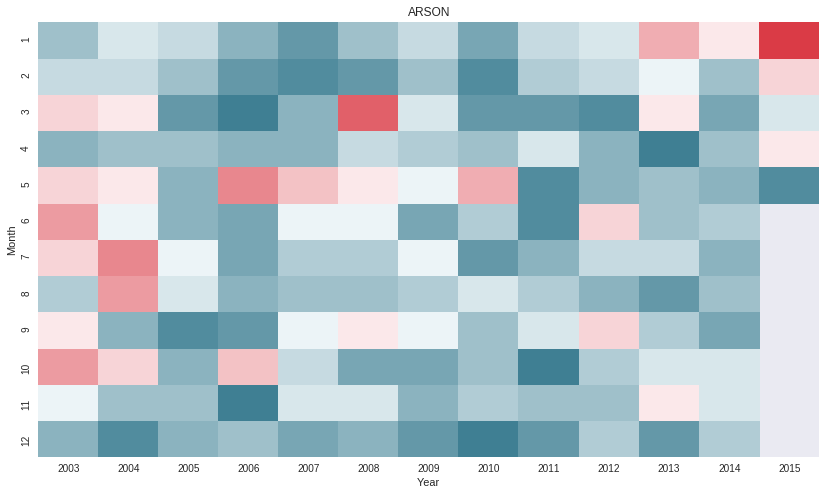

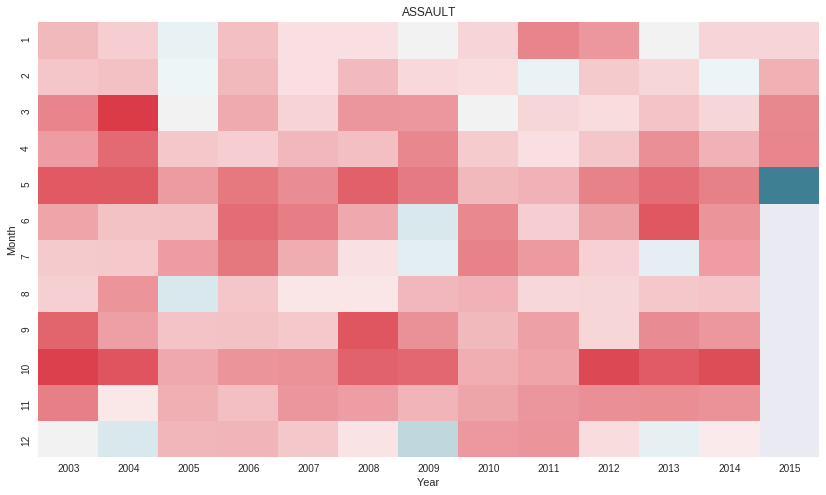

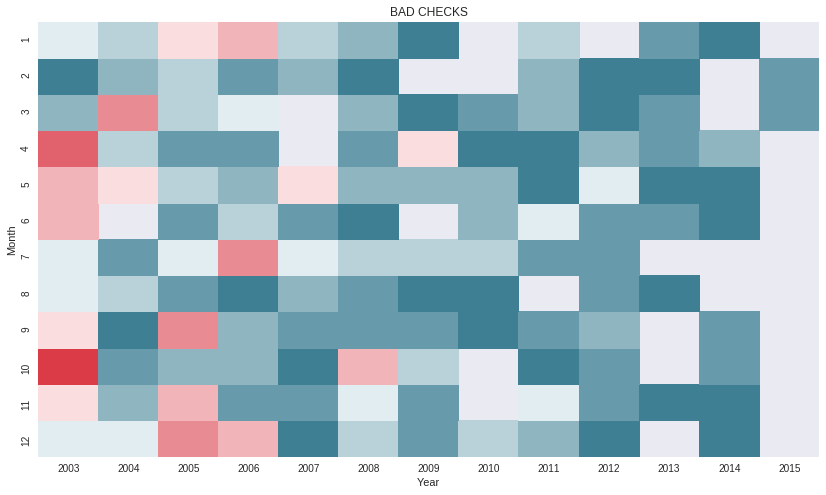

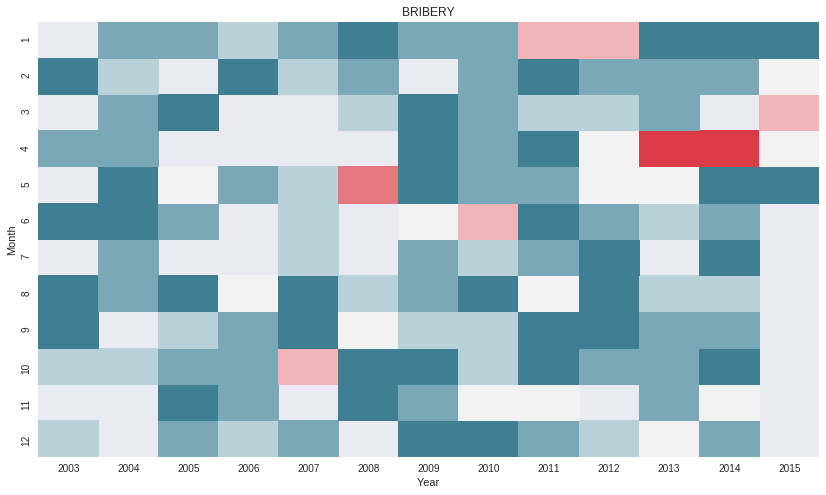

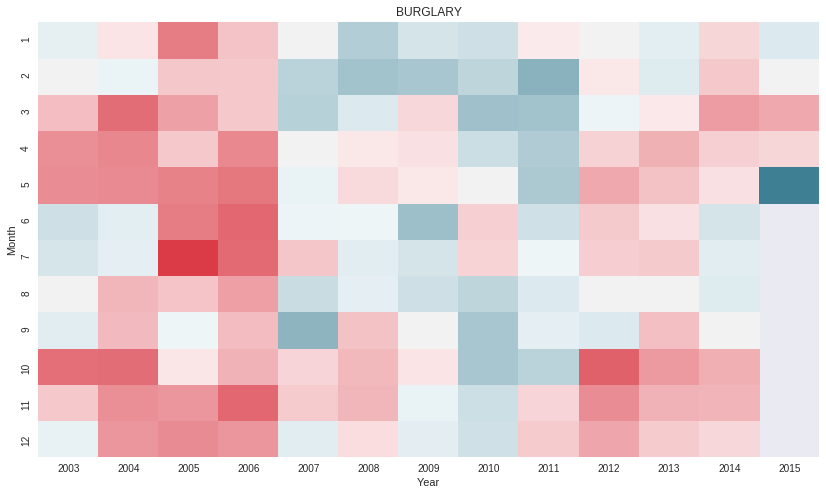

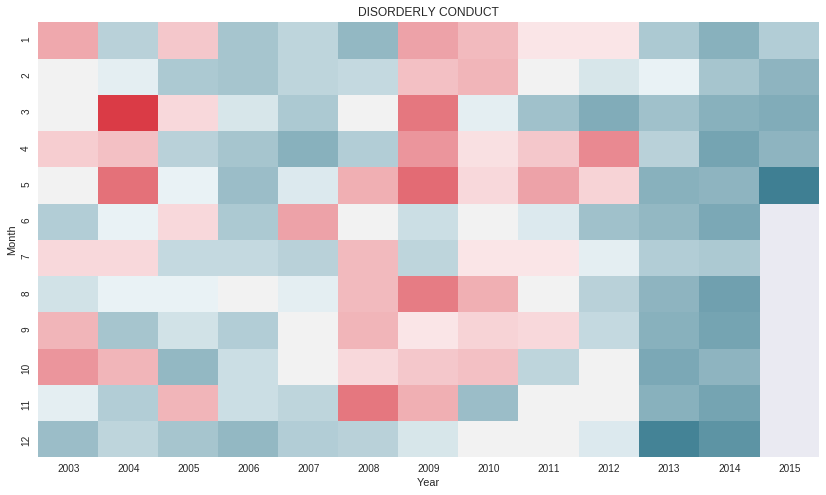

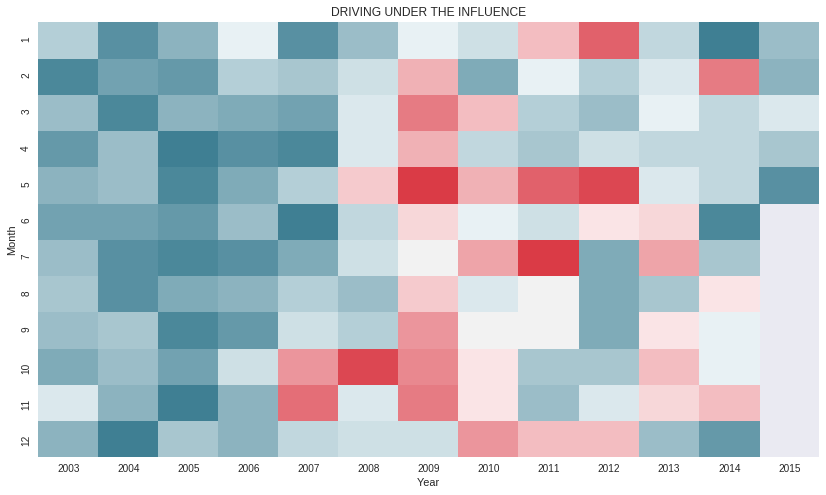

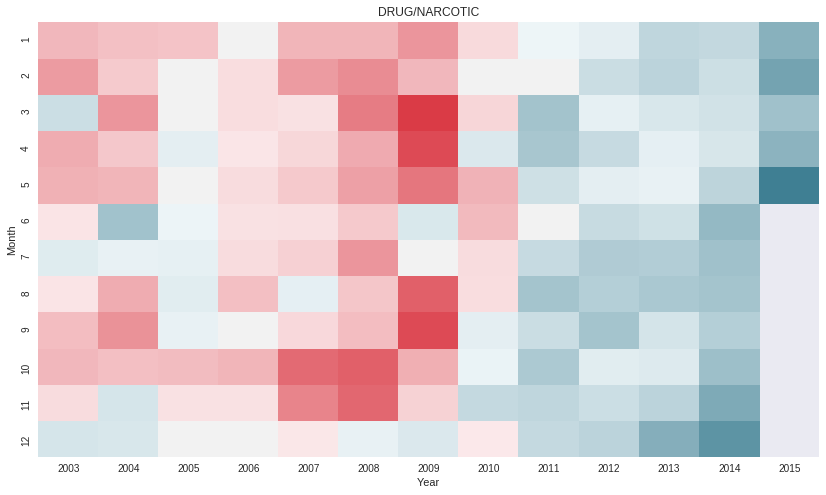

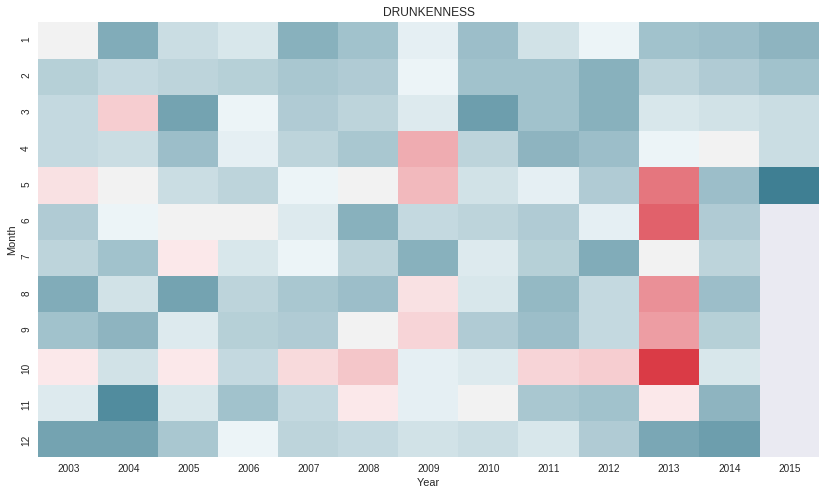

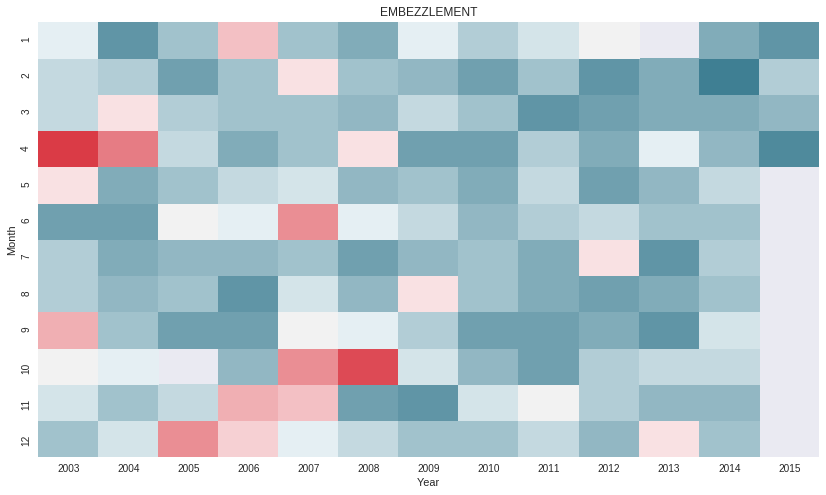

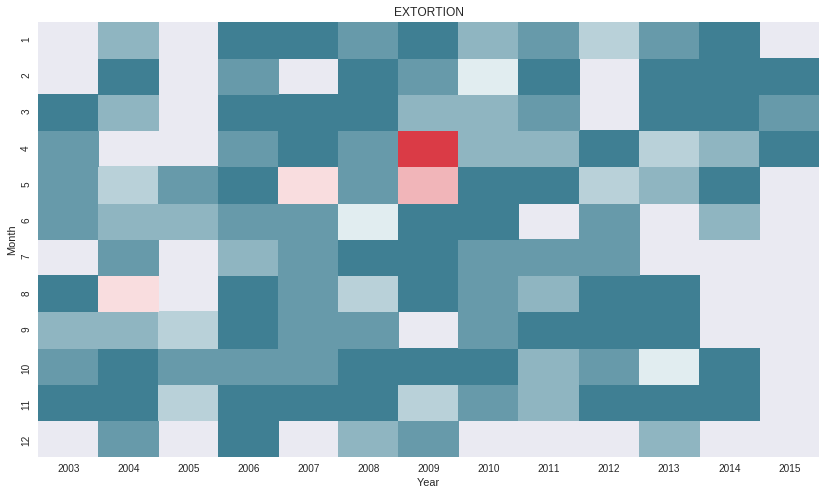

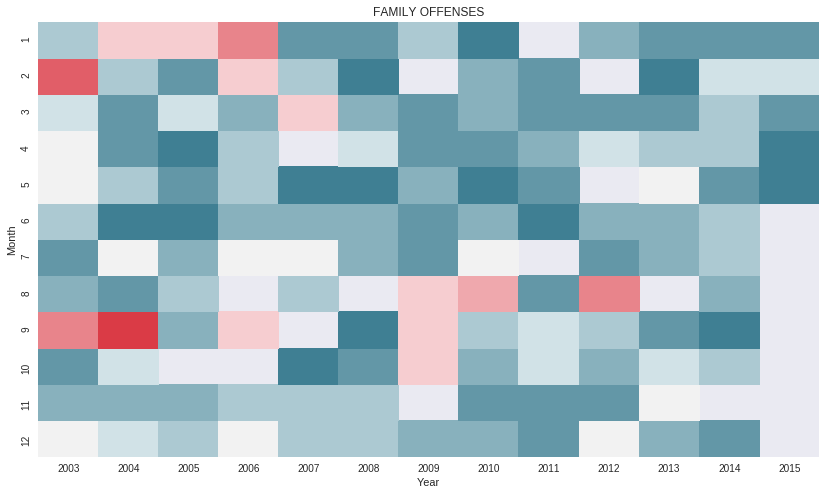

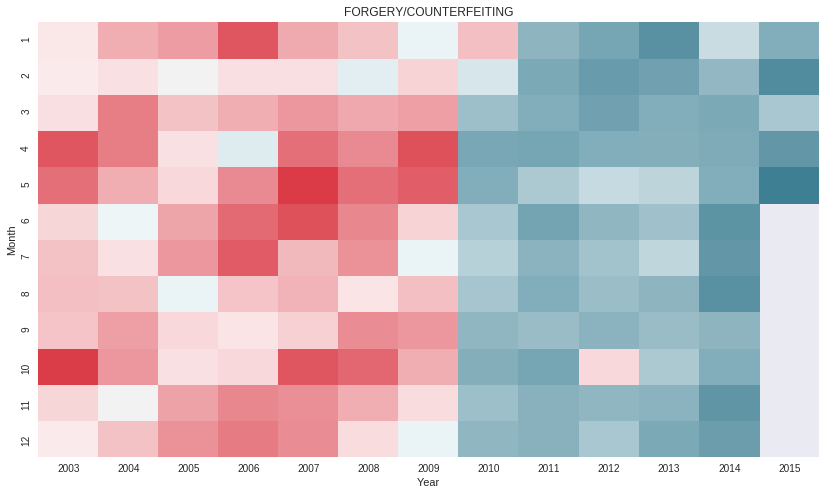

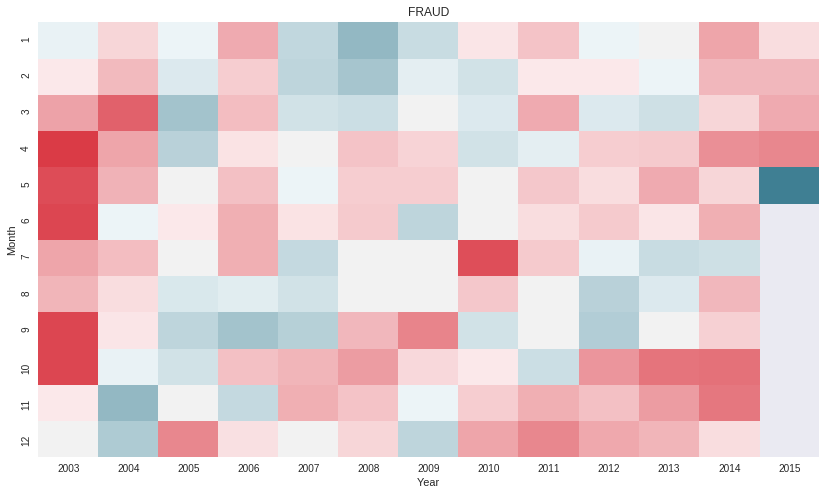

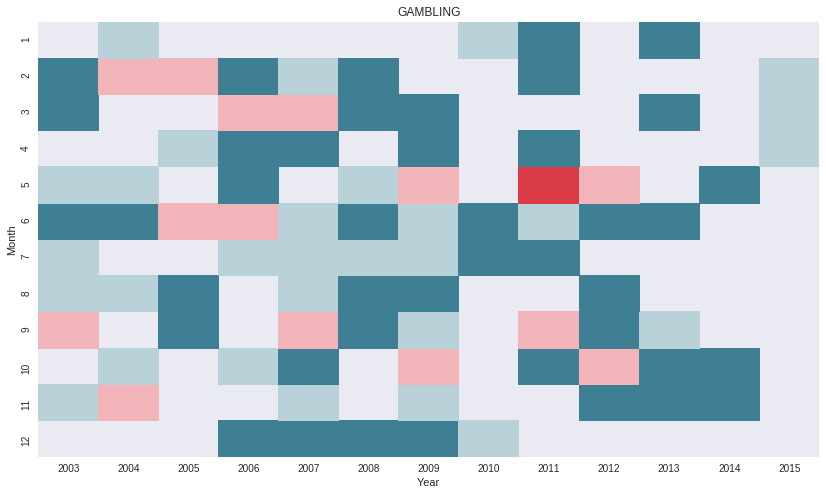

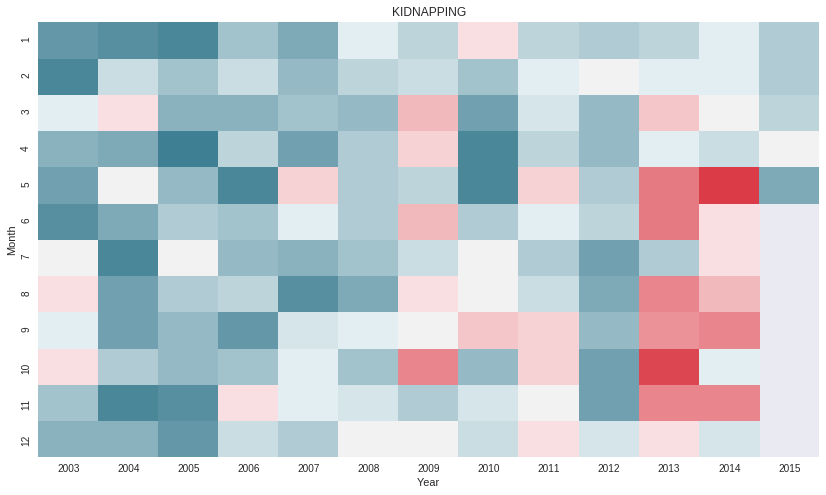

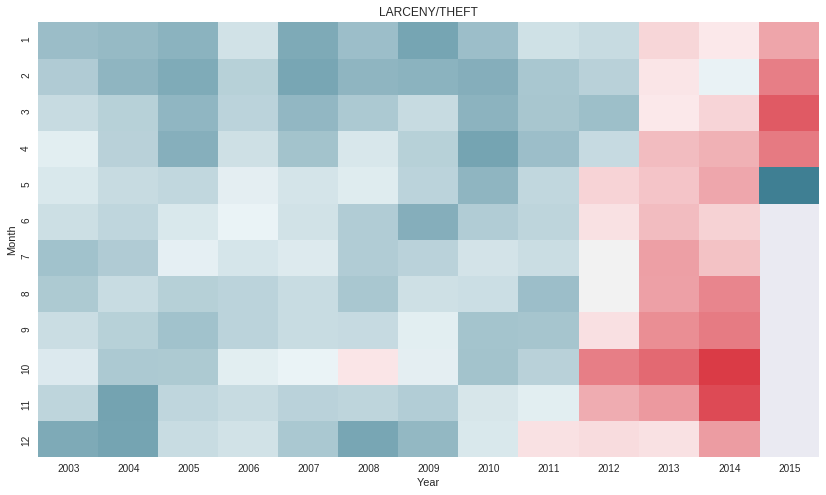

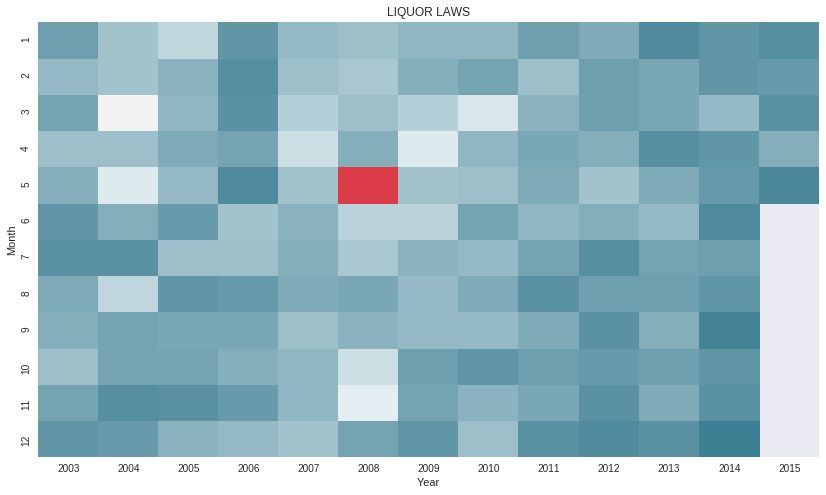

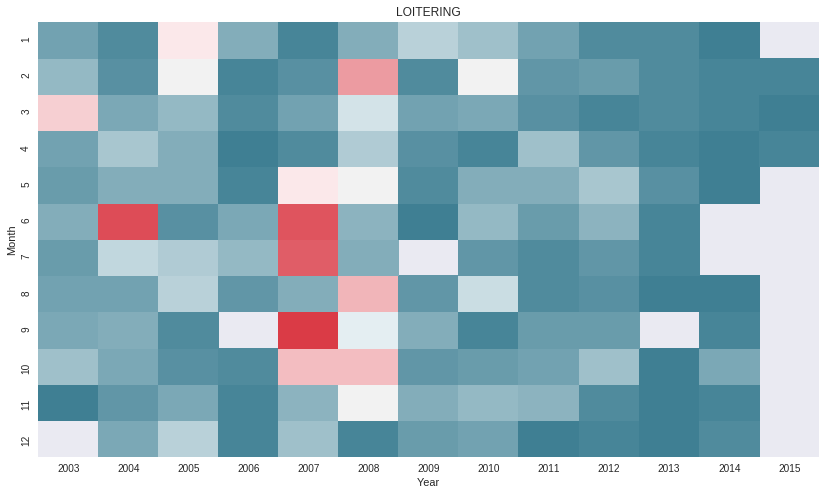

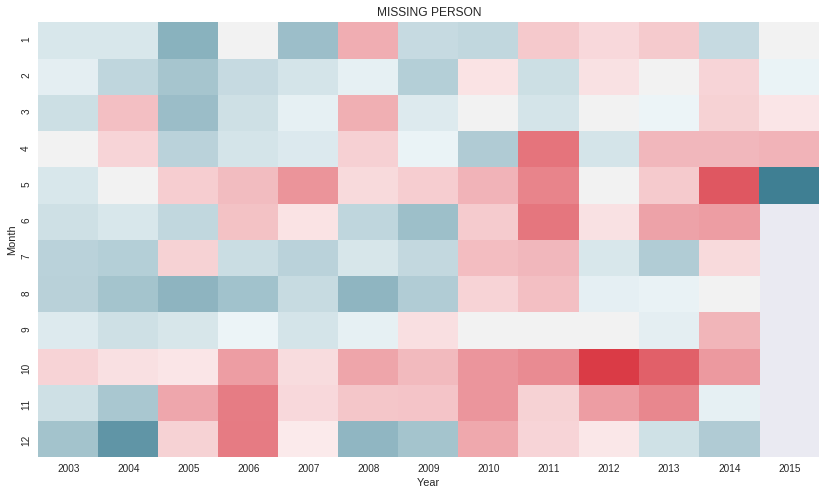

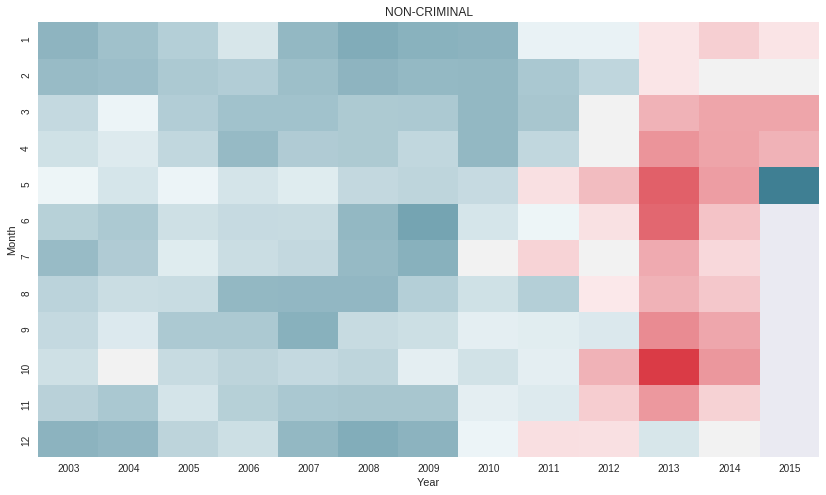

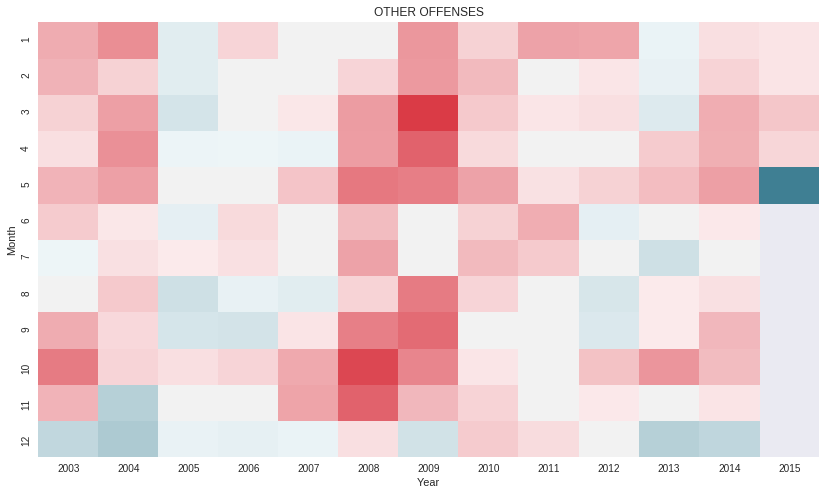

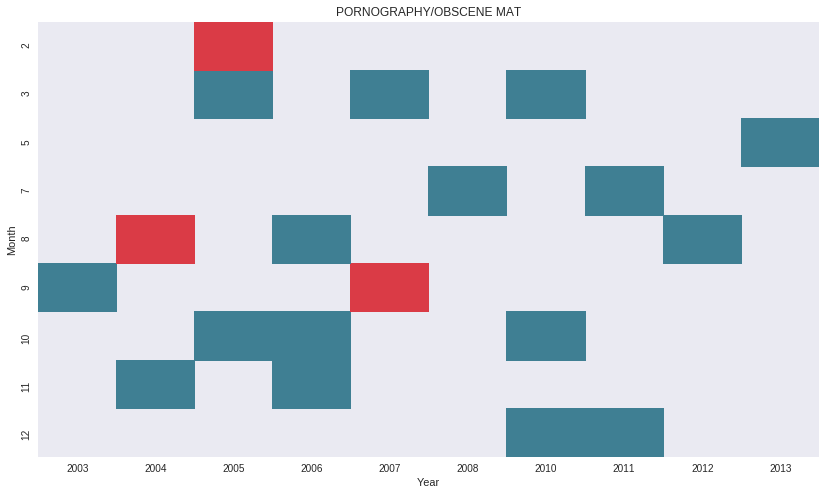

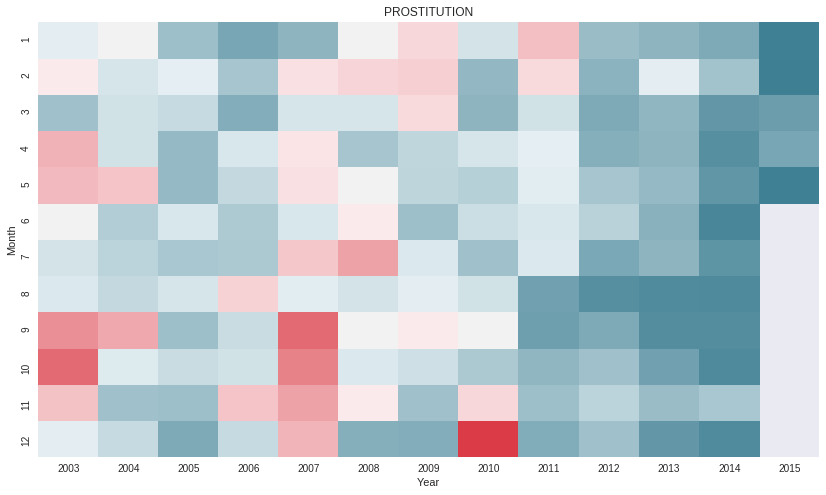

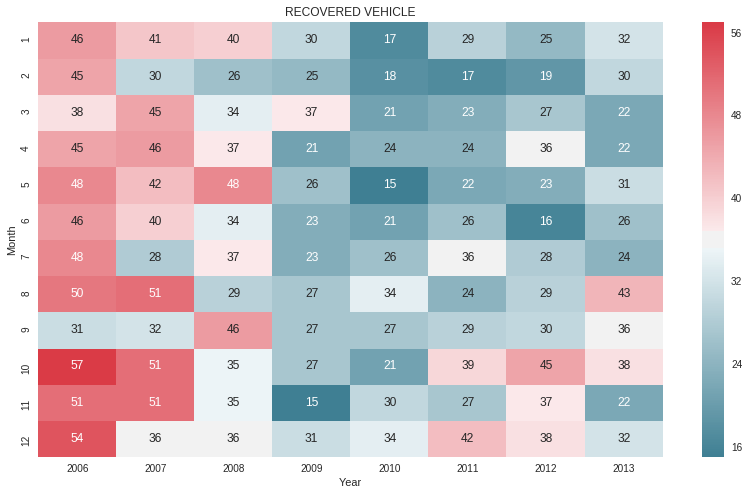

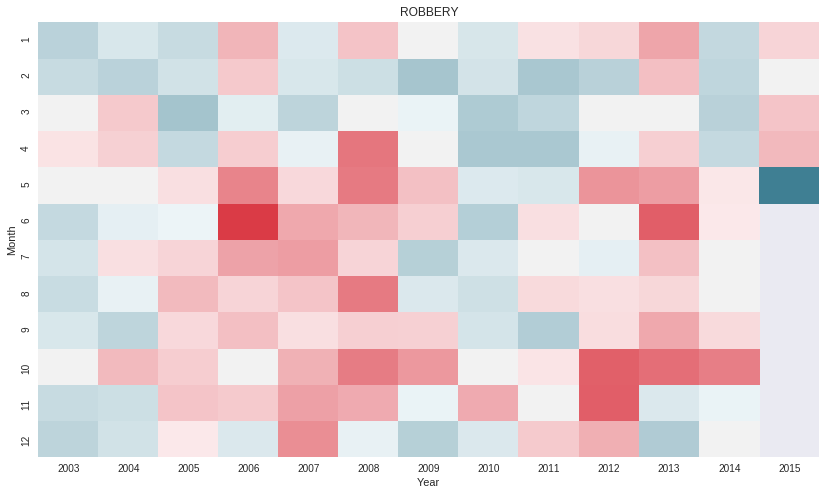

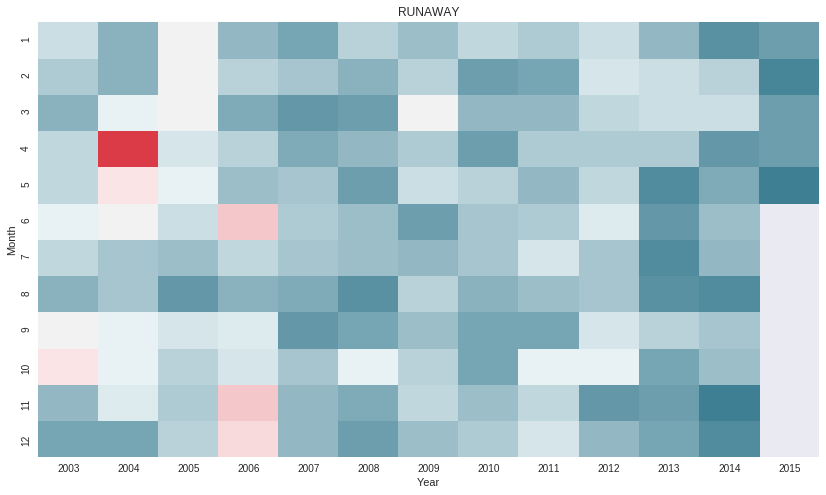

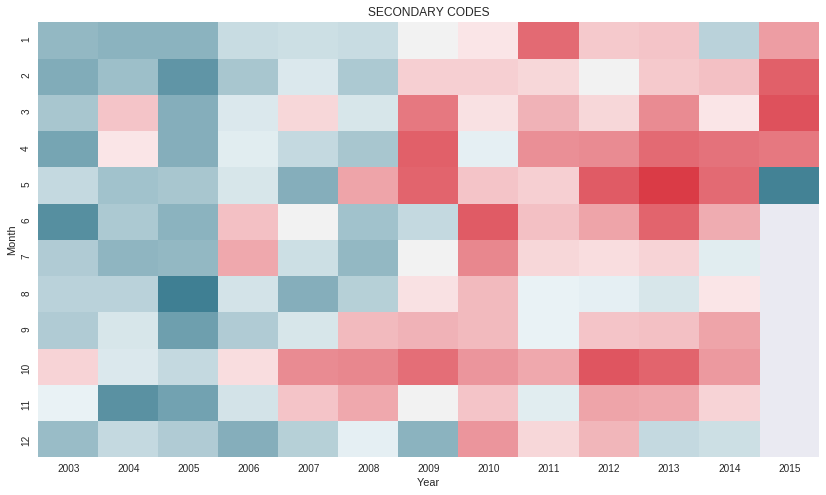

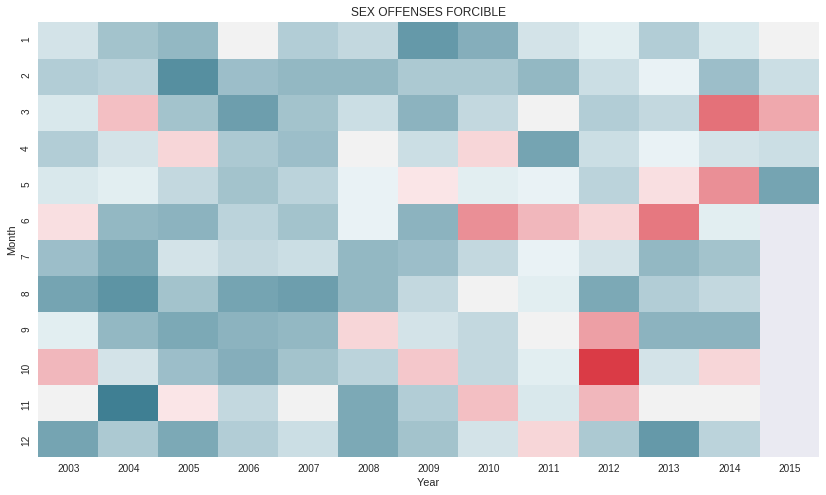

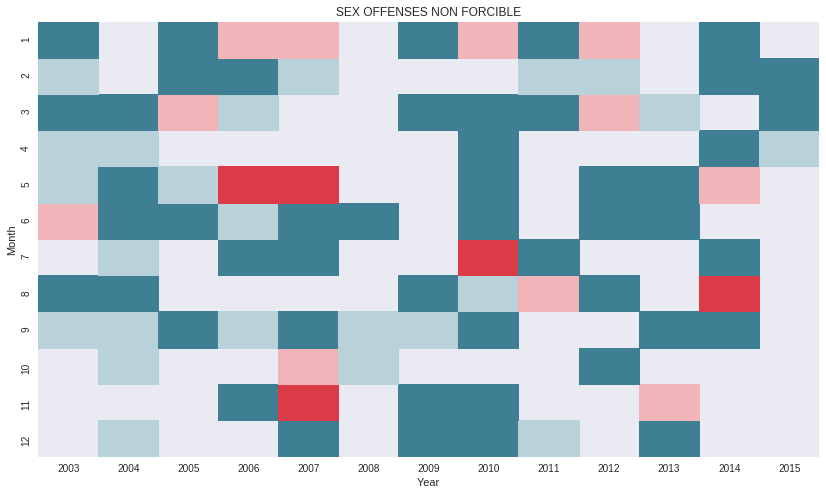

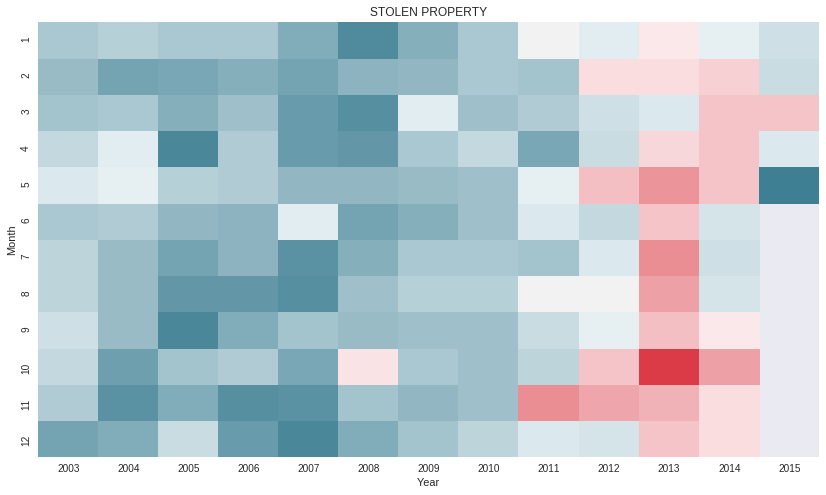

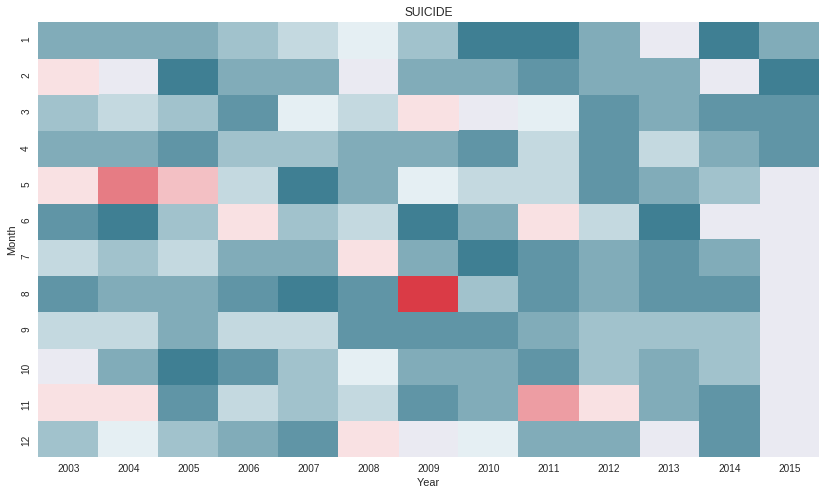

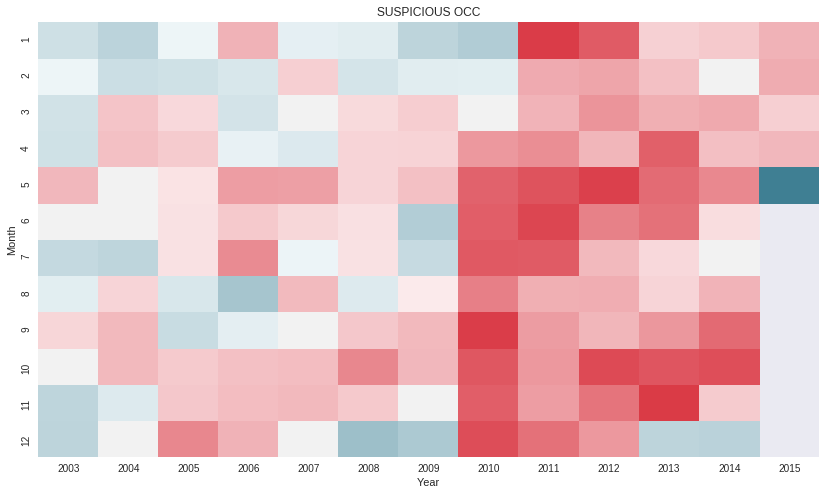

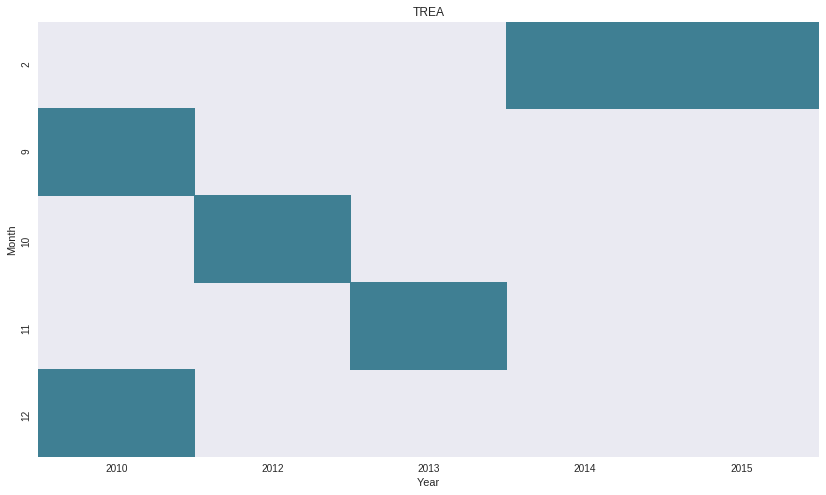

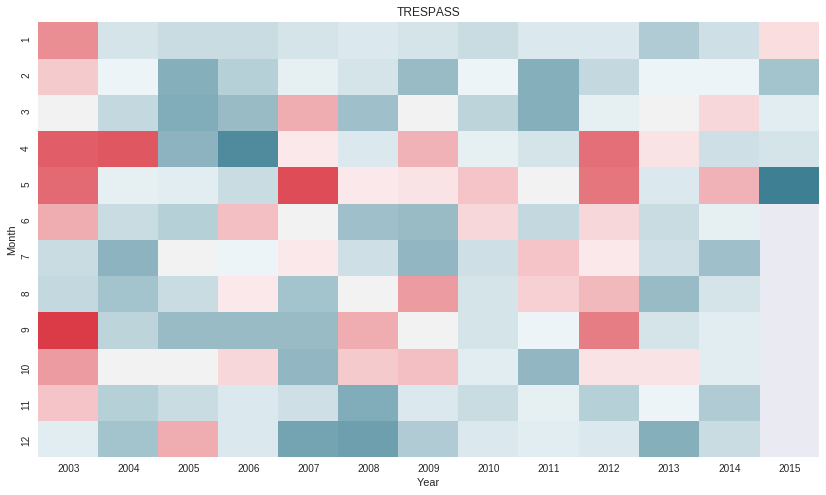

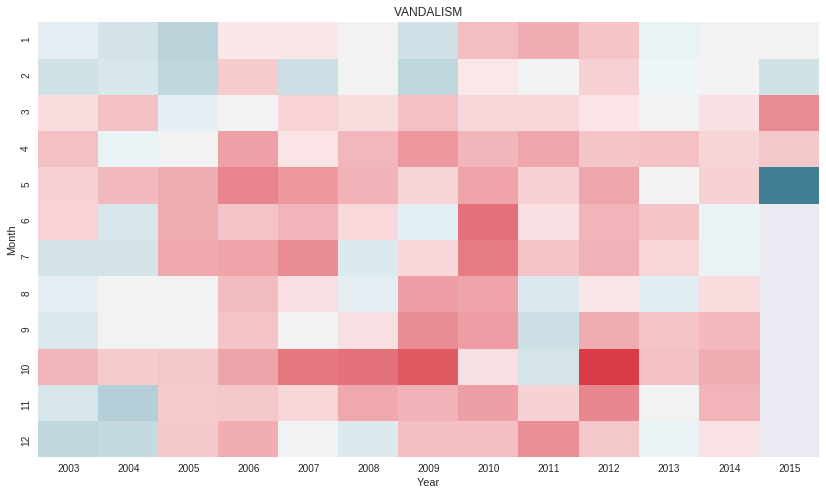

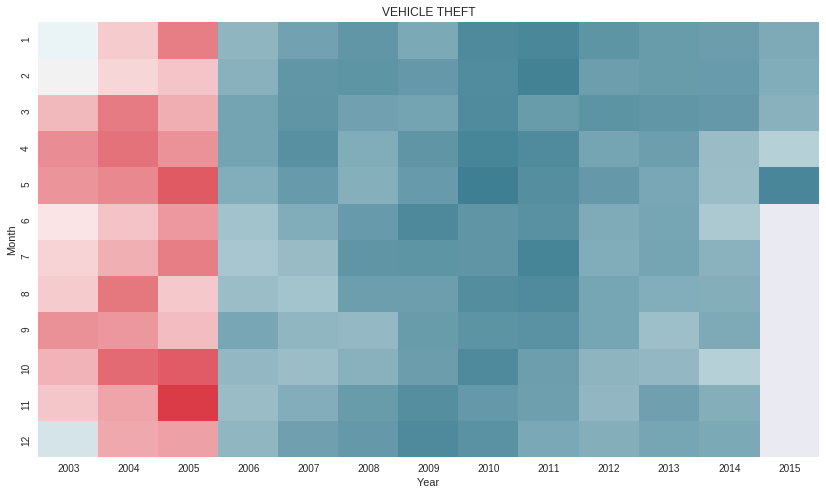

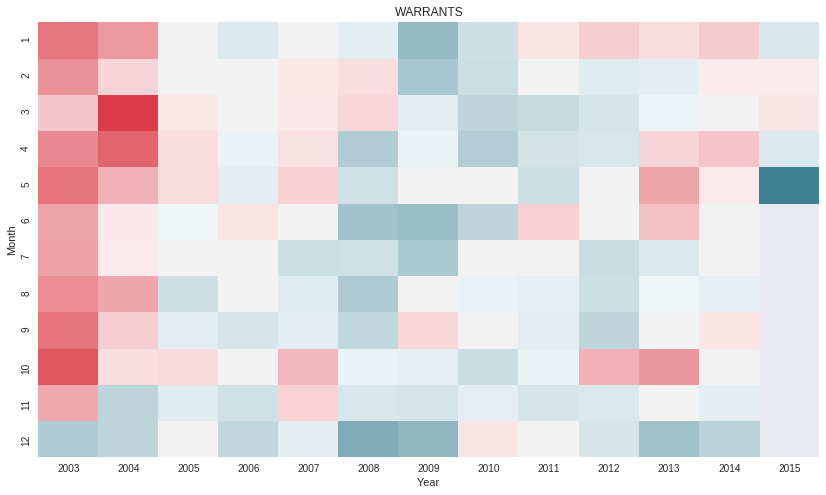

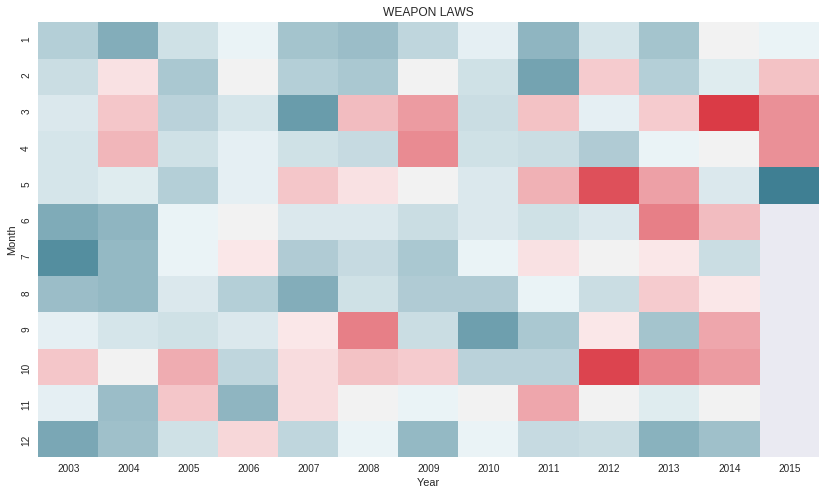

In [59]:
import seaborn as sns
for name in category_levels:
    plt.figure(figsize=(14, 8))
    sns.set()
    part_ymc = year_month_category[year_month_category['Category']==name]
    ymc_pivot = part_ymc.pivot("Month", "Year", "Count")
    try:
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = sns.heatmap(ymc_pivot,cmap=cmap, annot=True, fmt="d")
    except ValueError:
        pass
    plt.title(name)
    
    plt.show()


In [64]:
year_hour_category = pd.DataFrame()
train['Count'] = 0
train['Year_Hour'] = train['Dates'].dt.strftime("%Y/%h")
year_hour_category = train[['Year','Hour','Category','Count']].groupby(by=['Year','Hour','Category'])\
.agg({'Count':'count'})
category_levels = year_hour_category.index.levels[2].tolist()
year_hour_category.reset_index(inplace=True) 
print("year.hour.category.head:")
print(year_hour_category.head())
print("\n\n")
print("category.levels:")
print(category_levels)

year.hour.category.head:
   Year  Hour            Category  Count
0  2003     0               ARSON      4
1  2003     0             ASSAULT    324
2  2003     0          BAD CHECKS      8
3  2003     0            BURGLARY    108
4  2003     0  DISORDERLY CONDUCT     33



category.levels:
['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']


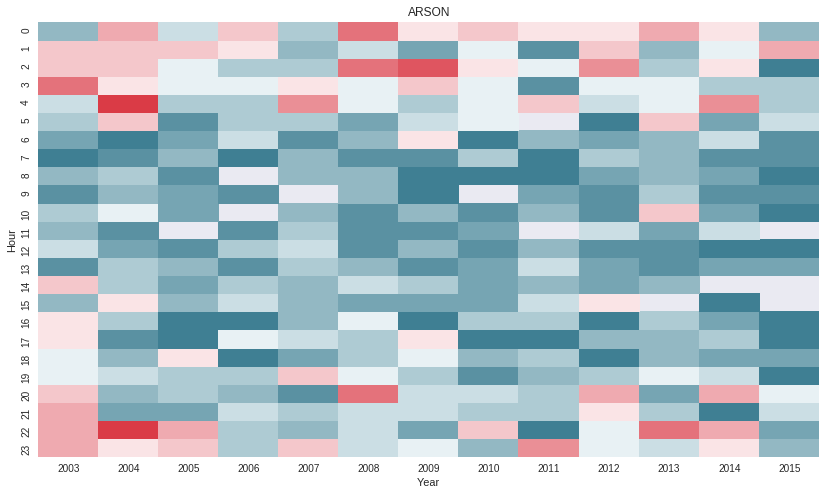

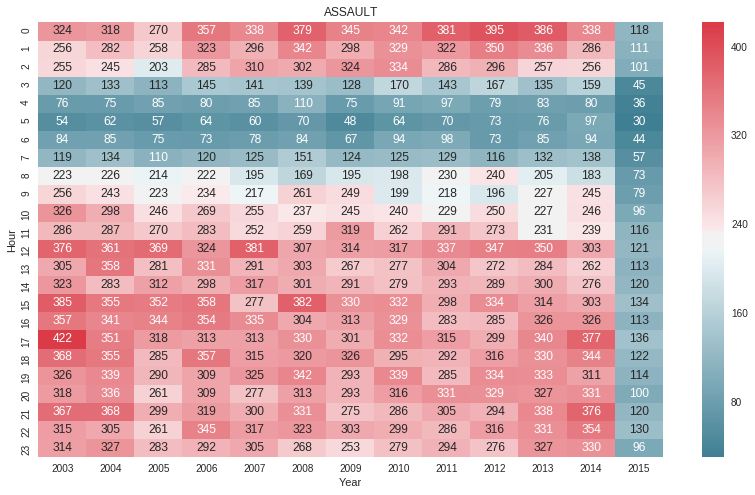

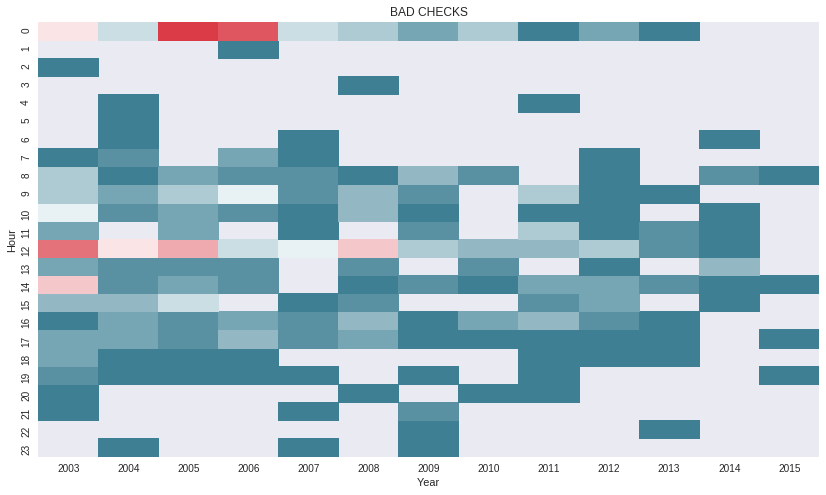

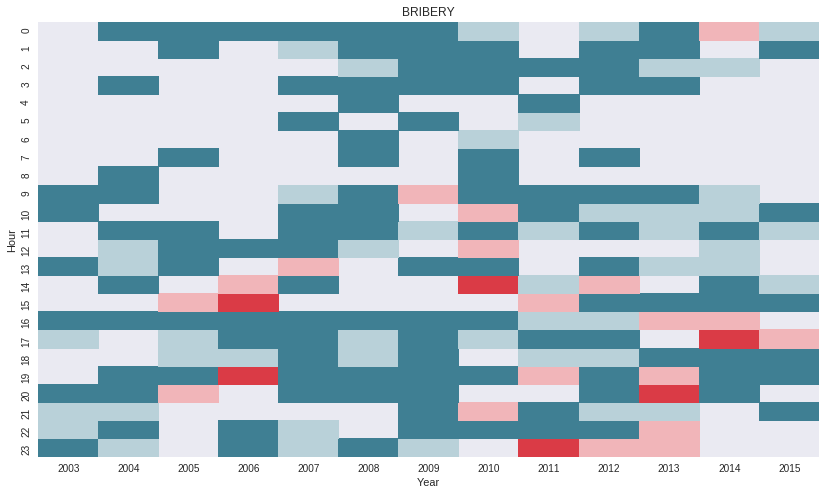

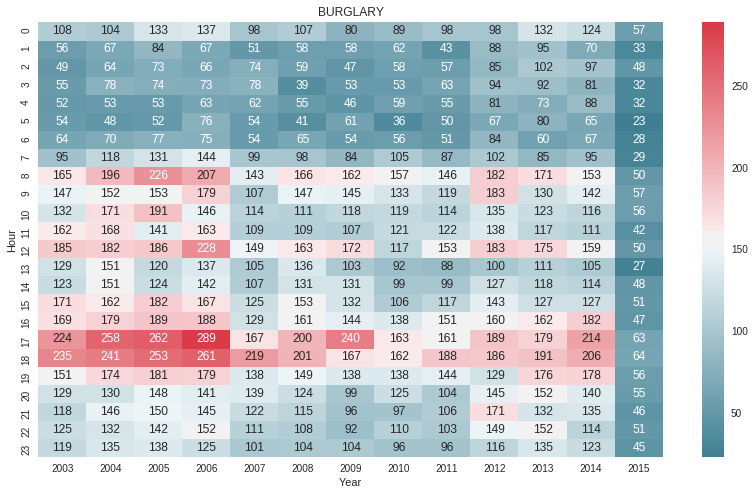

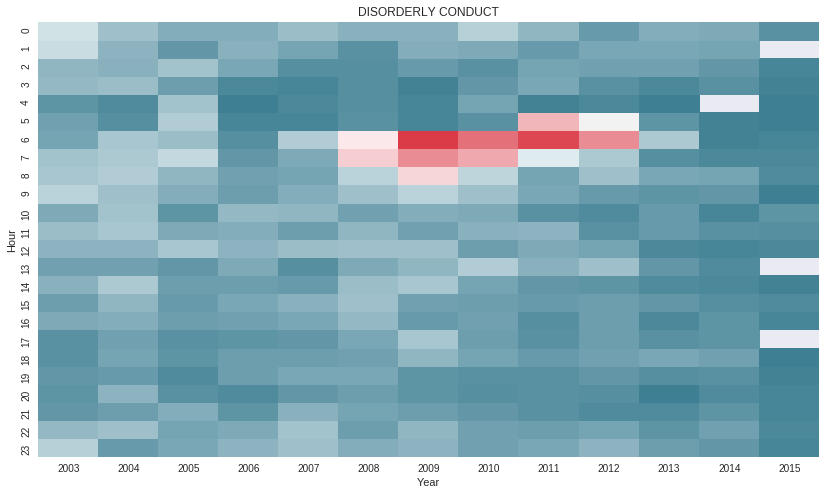

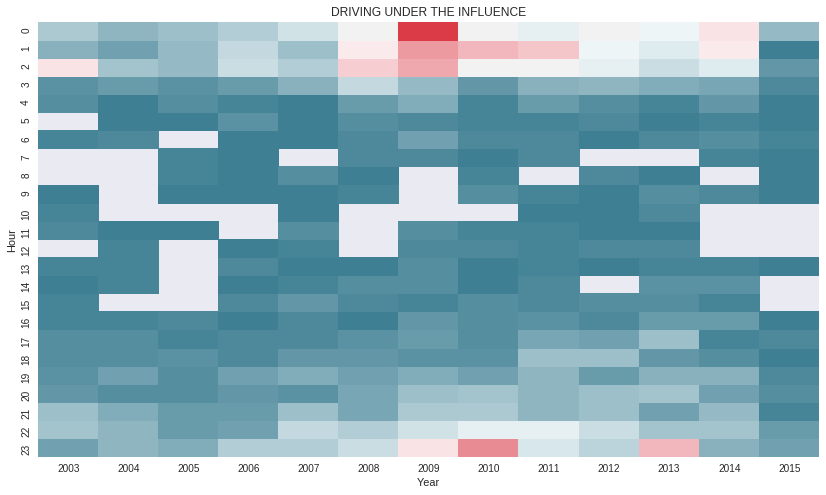

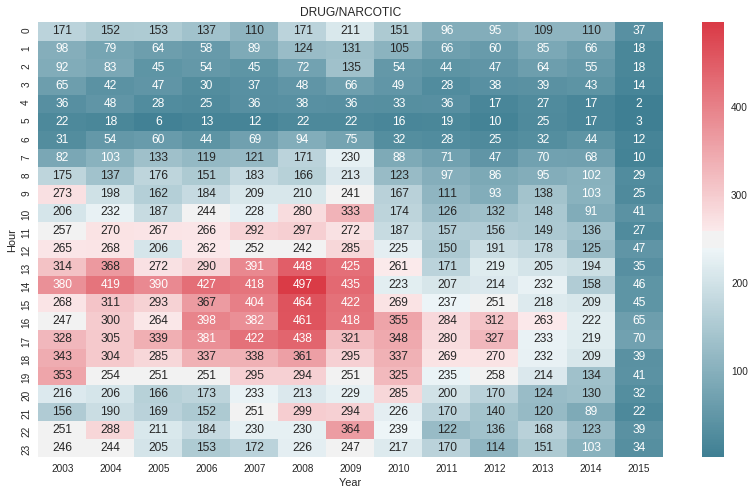

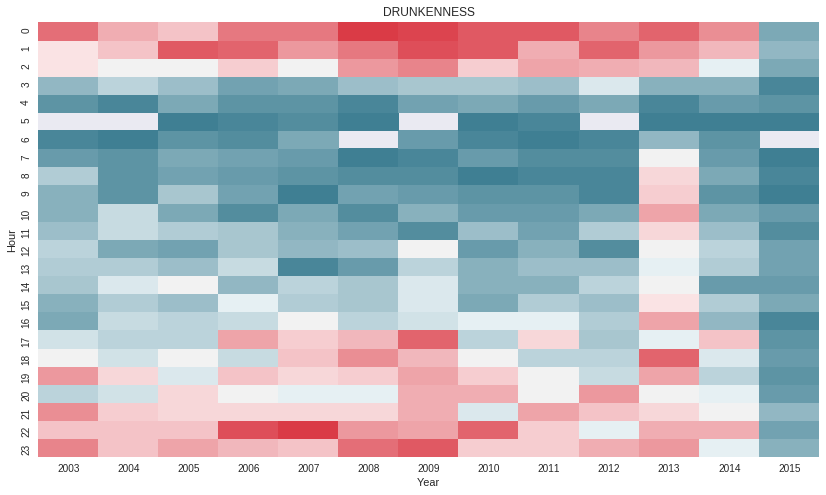

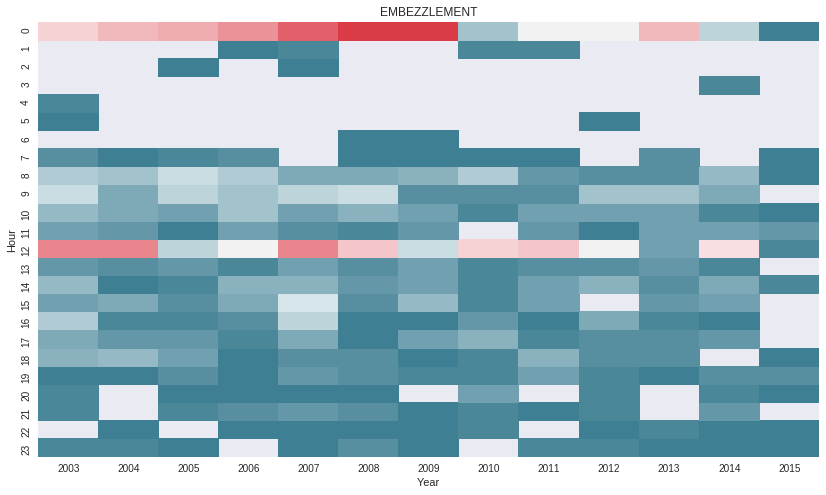

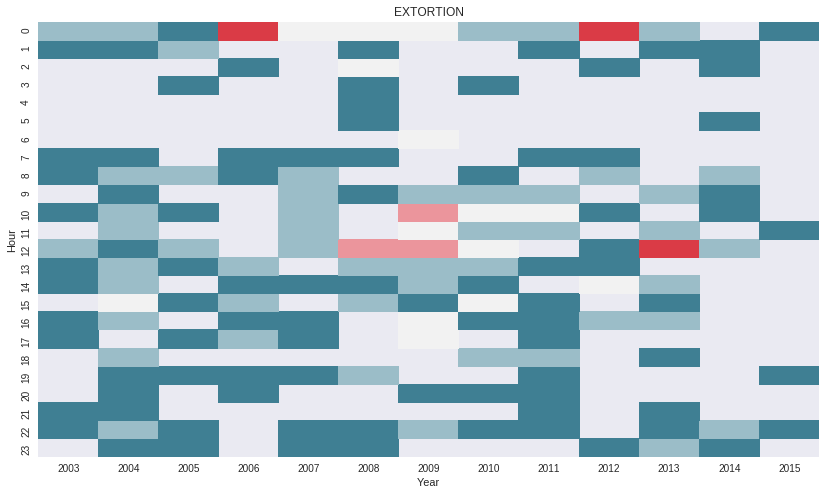

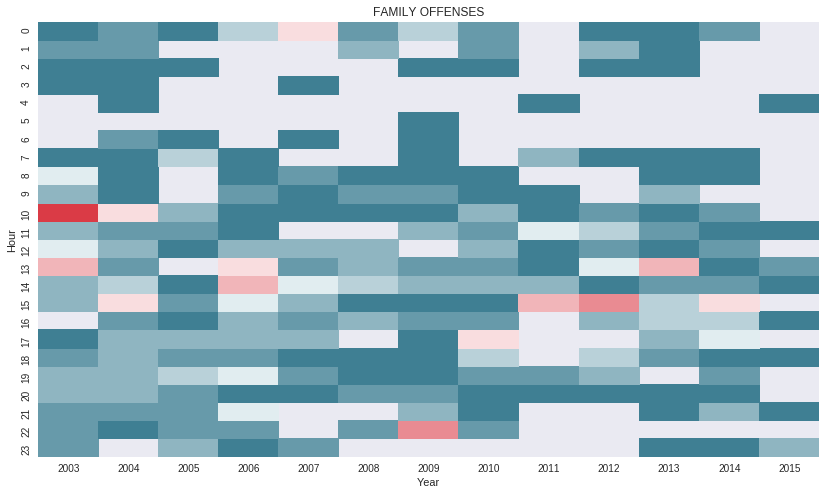

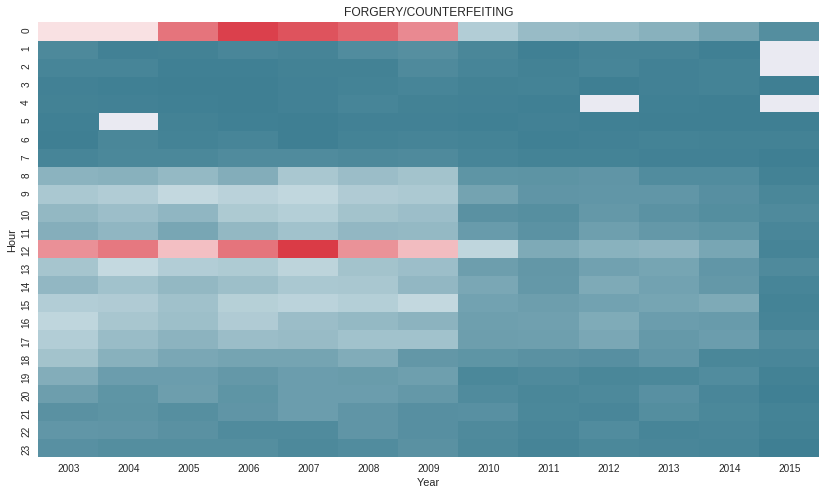

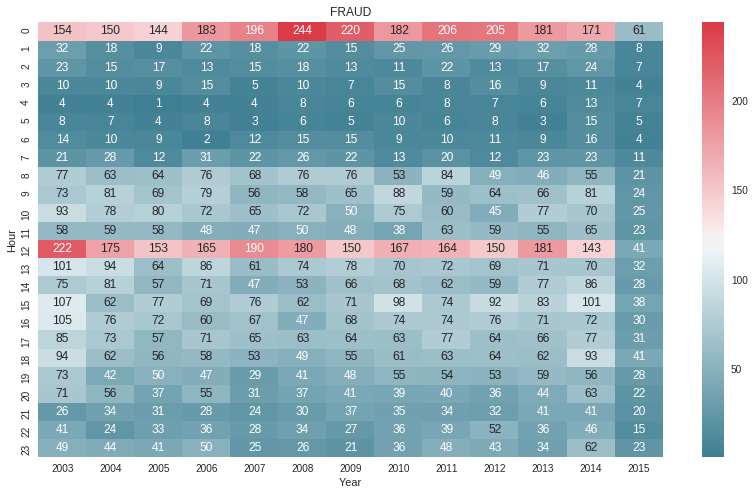

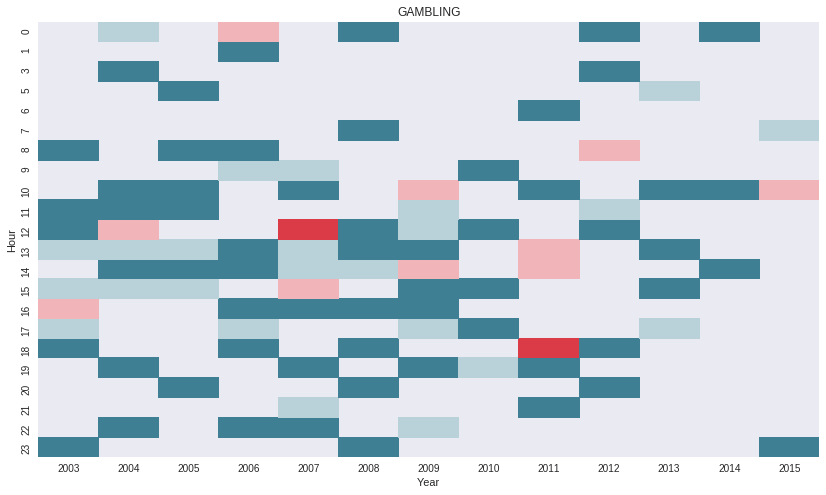

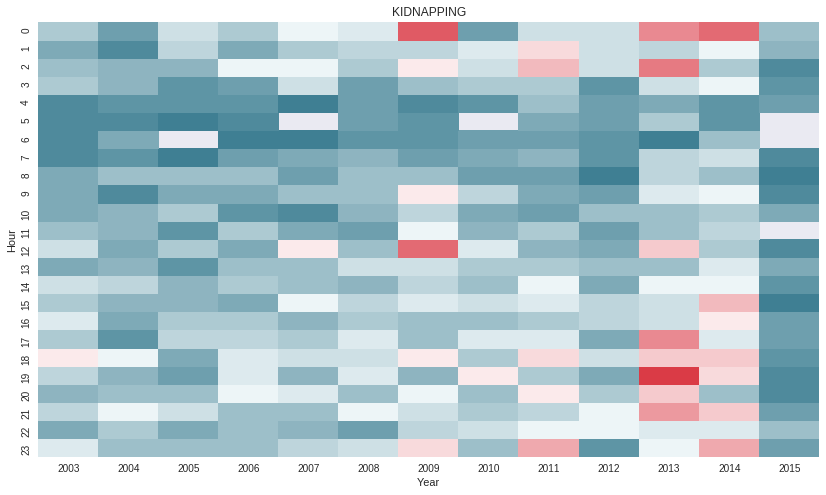

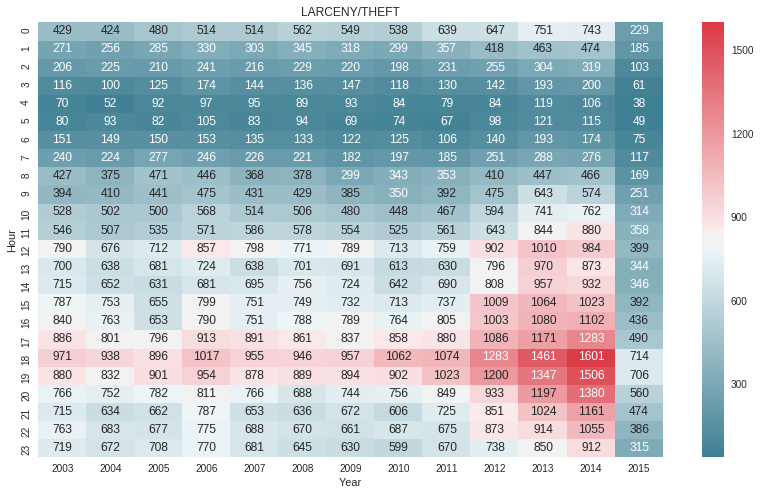

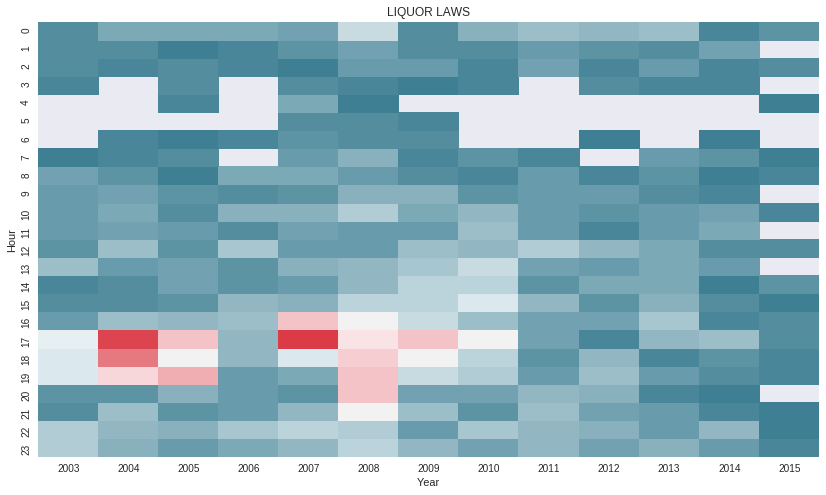

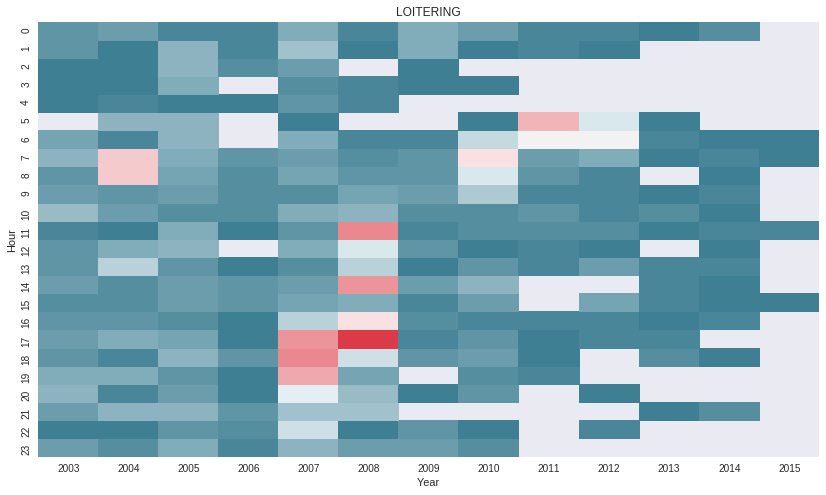

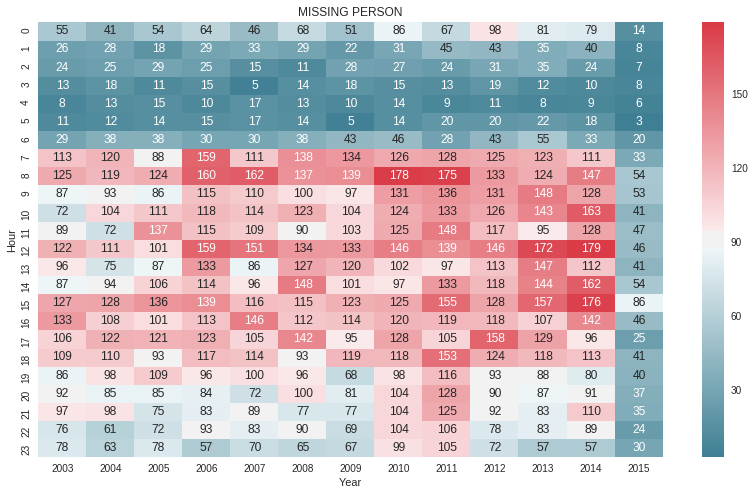

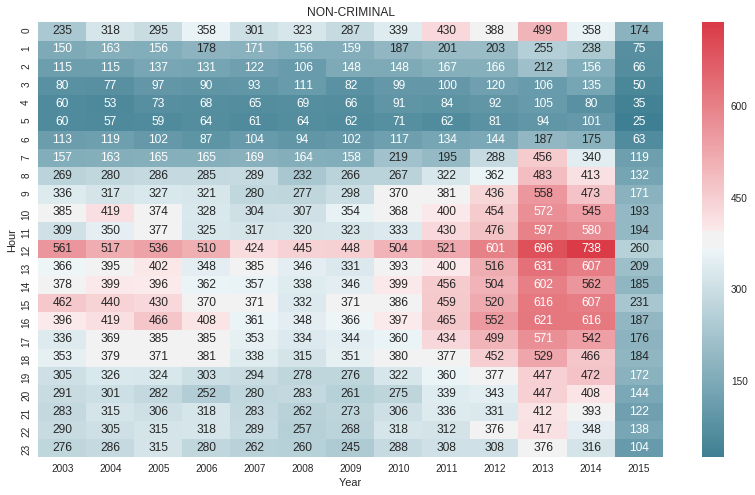

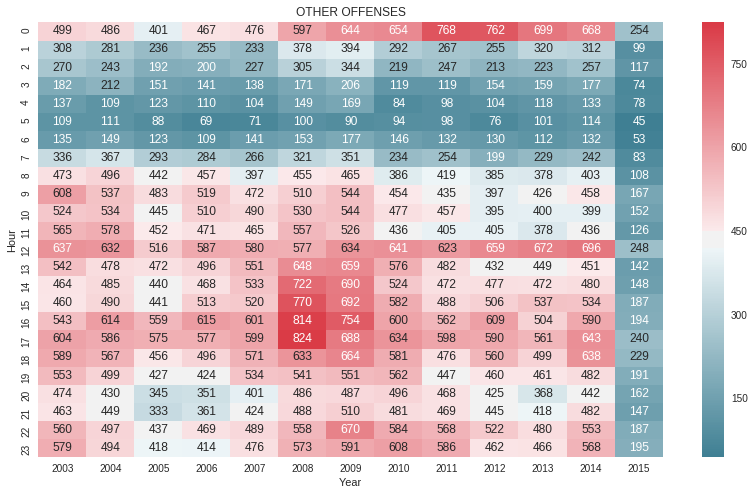

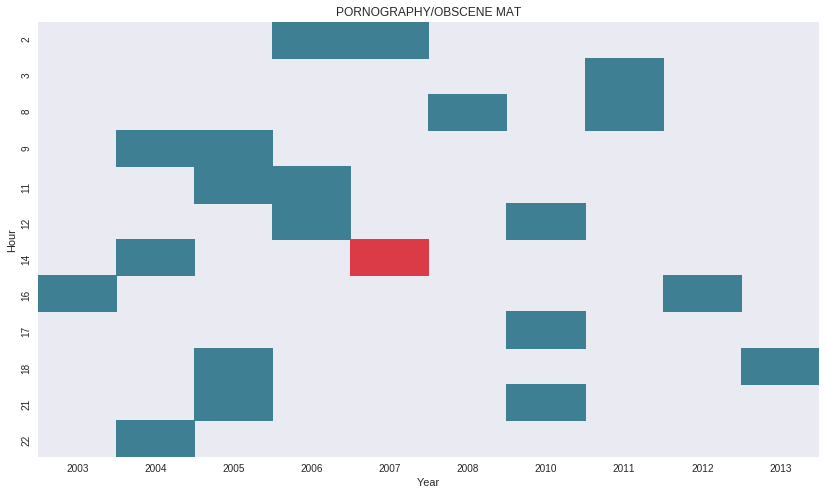

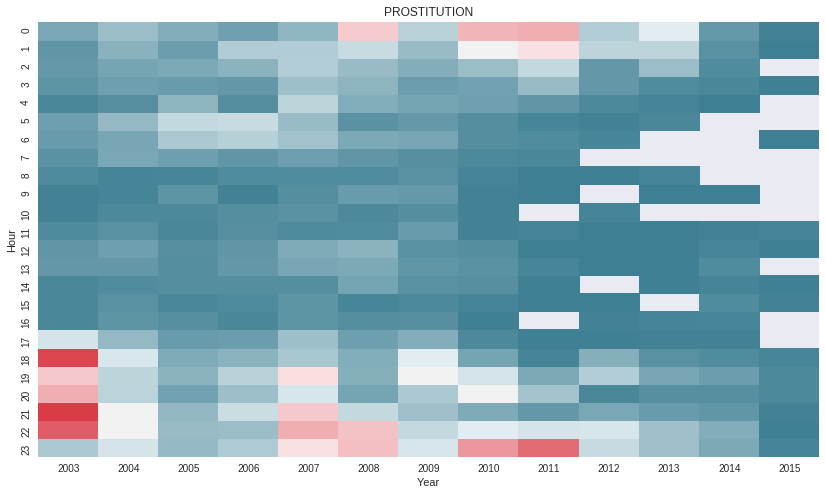

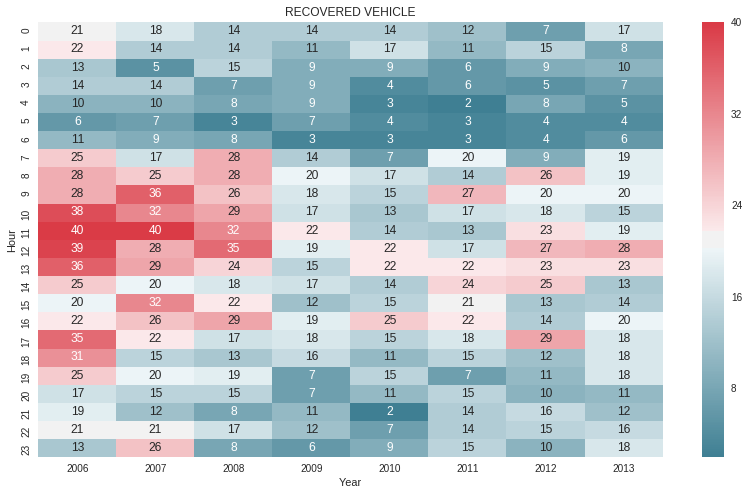

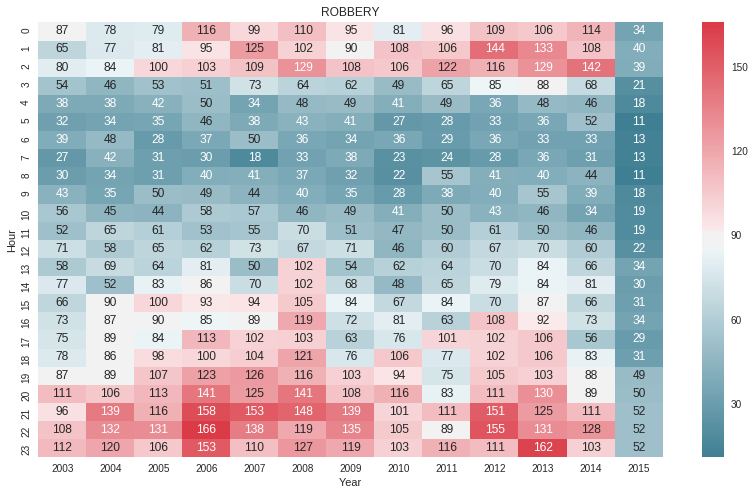

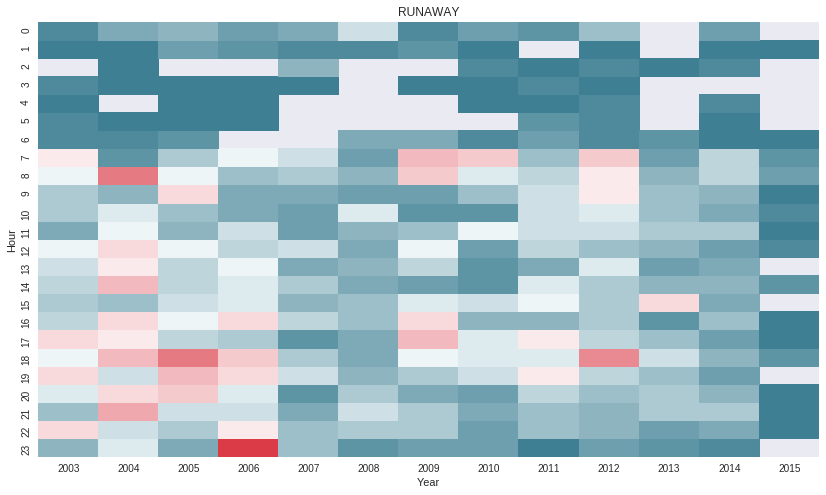

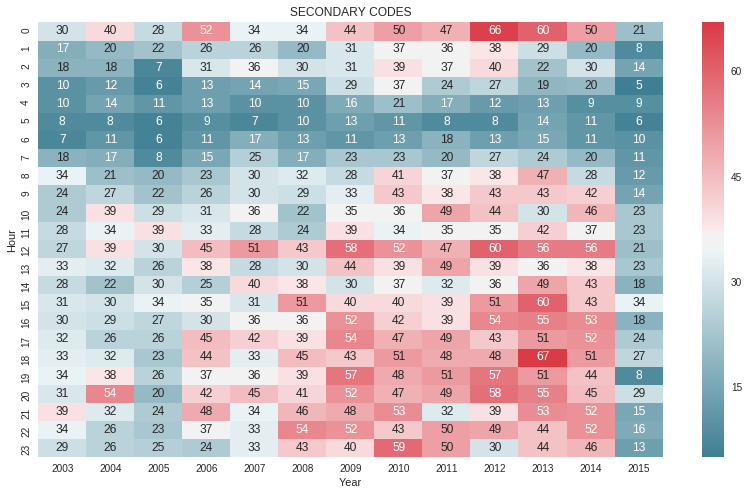

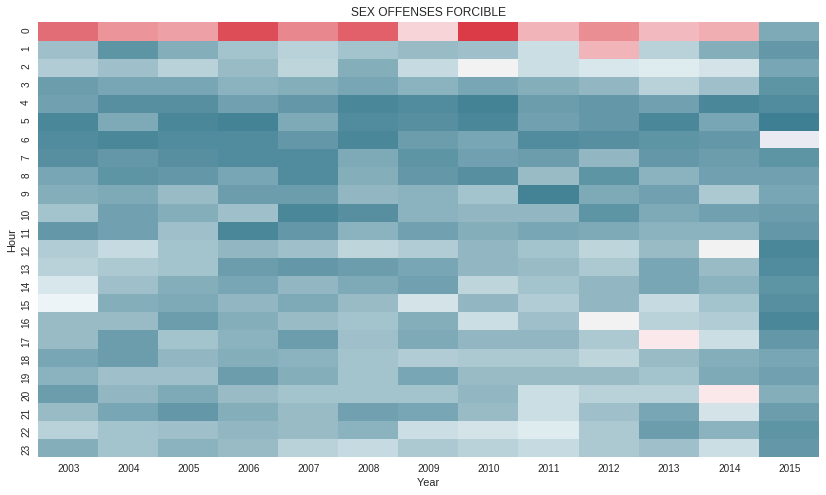

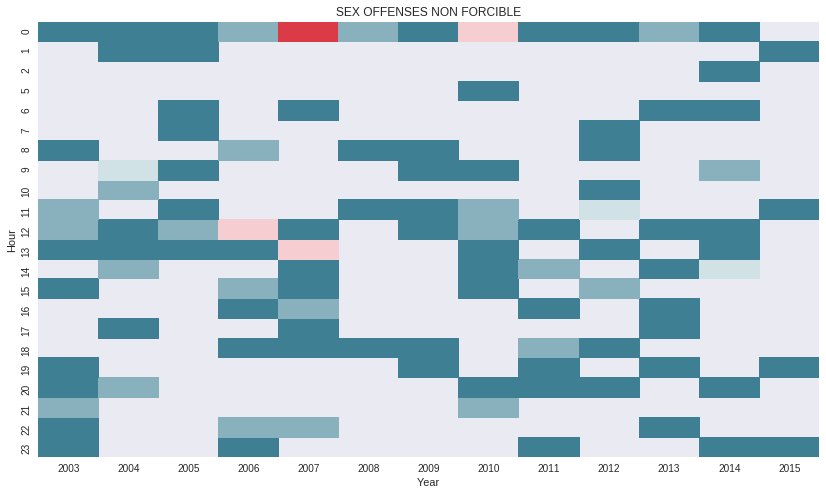

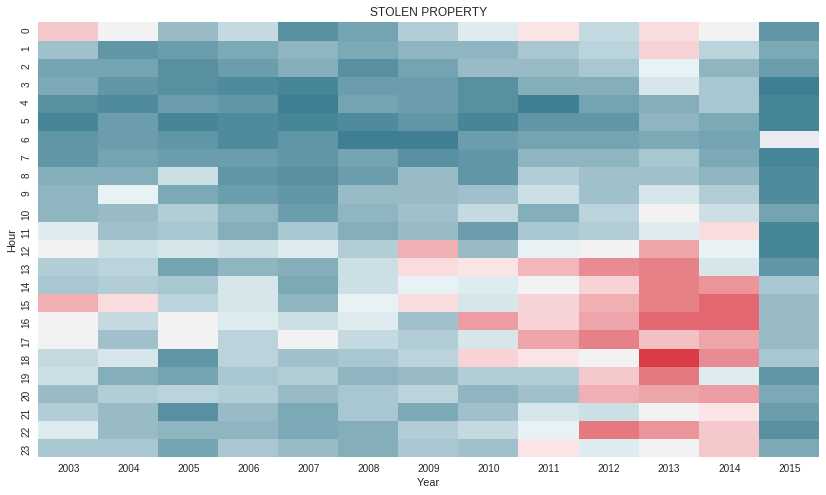

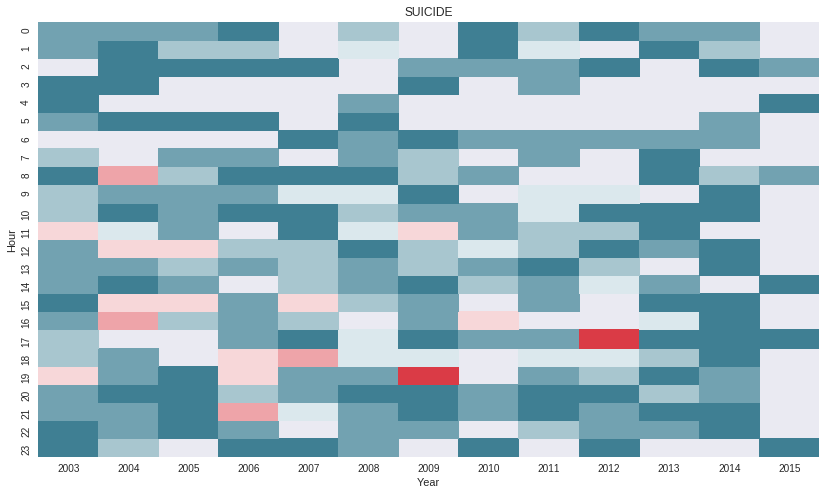

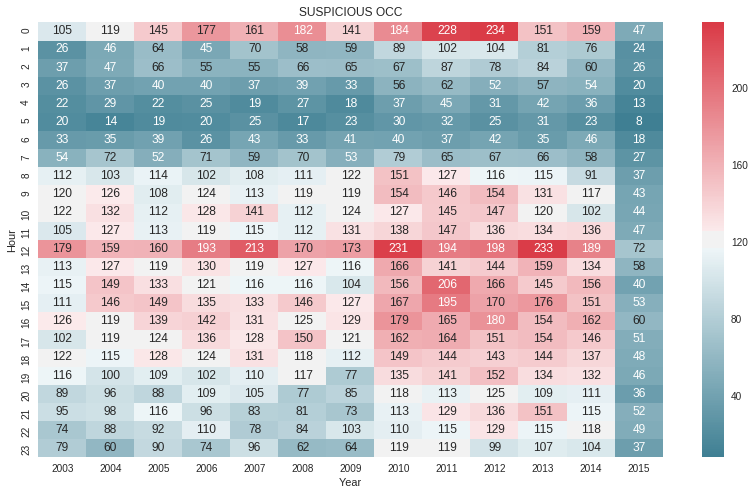

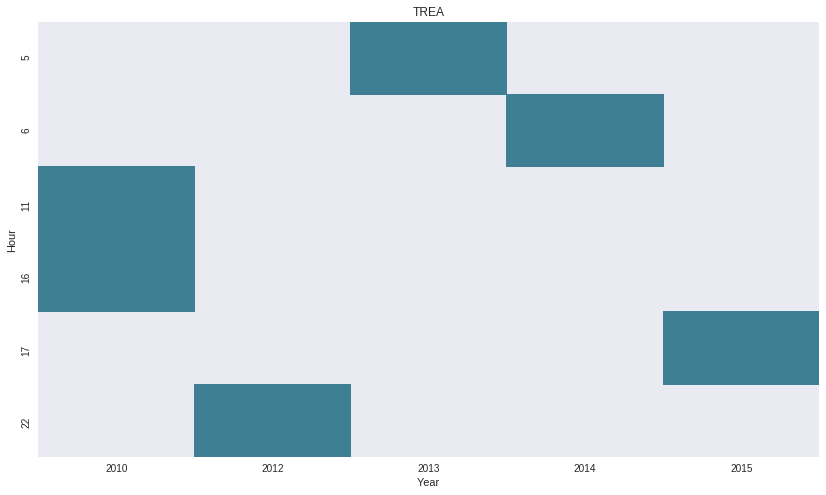

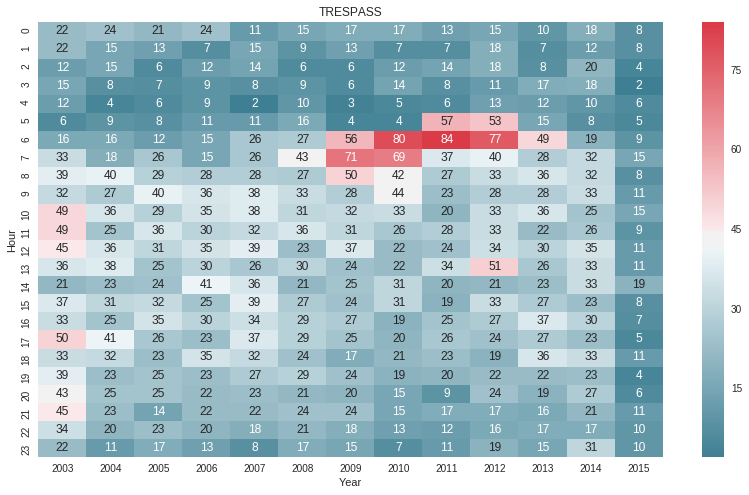

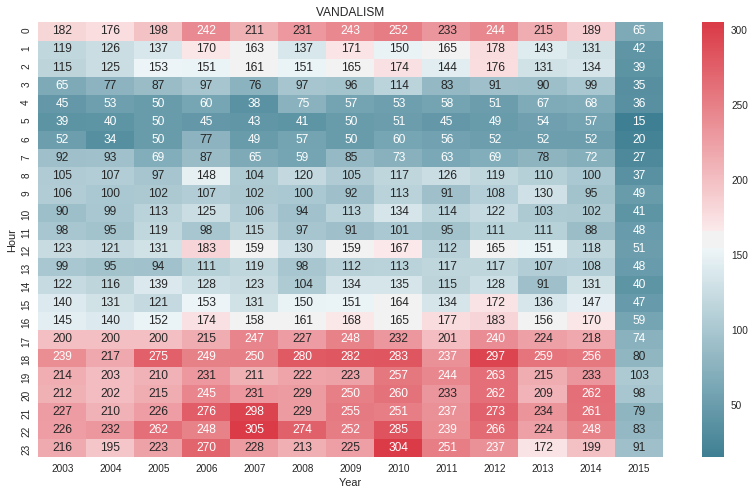

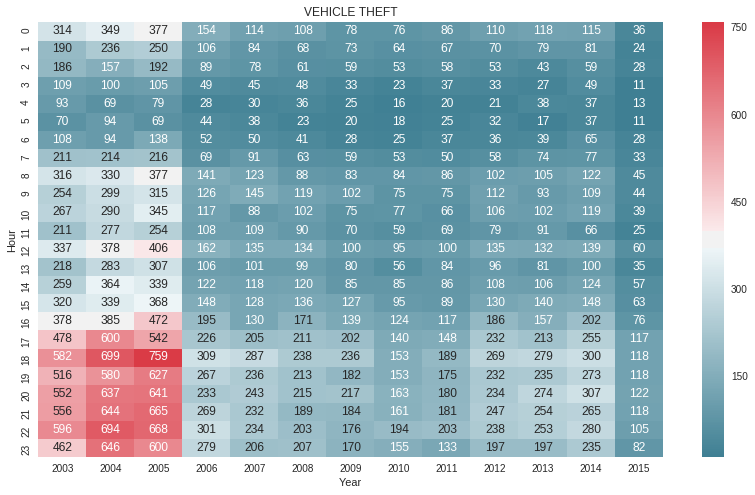

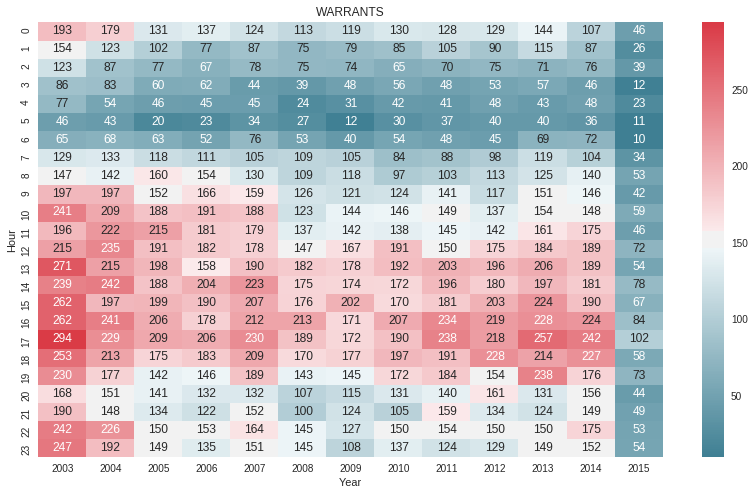

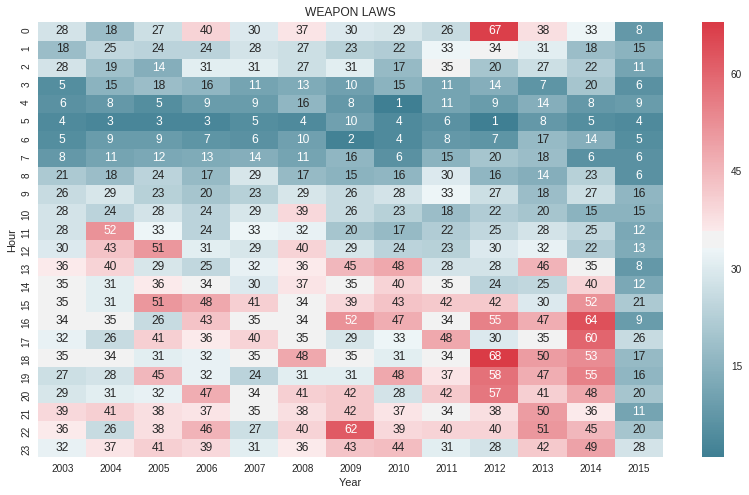

In [62]:
import seaborn as sns
for name in category_levels:
    plt.figure(figsize=(14, 8))
    sns.set()
    part_ymc = year_hour_category[year_hour_category['Category']==name]
    ymc_pivot = part_ymc.pivot("Hour", "Year", "Count")
    try:
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = sns.heatmap(ymc_pivot,cmap=cmap, annot=True, fmt="d")
    except ValueError:
        pass
    plt.title(name)
    
    plt.show()
